In [1]:
import numpy as np
from PIL import Image, ImageOps
from objectreader import ObjModel
import graphicsfunction as gf
import objectreader as nf

folder = f'img2/'
WIDTH = 1920
HEIGHT = 1080
DEFAULT_COLOR = (255, 255, 255)
BACKROUND_COLOR = (0, 0, 0)
l = [0, 0, 1]

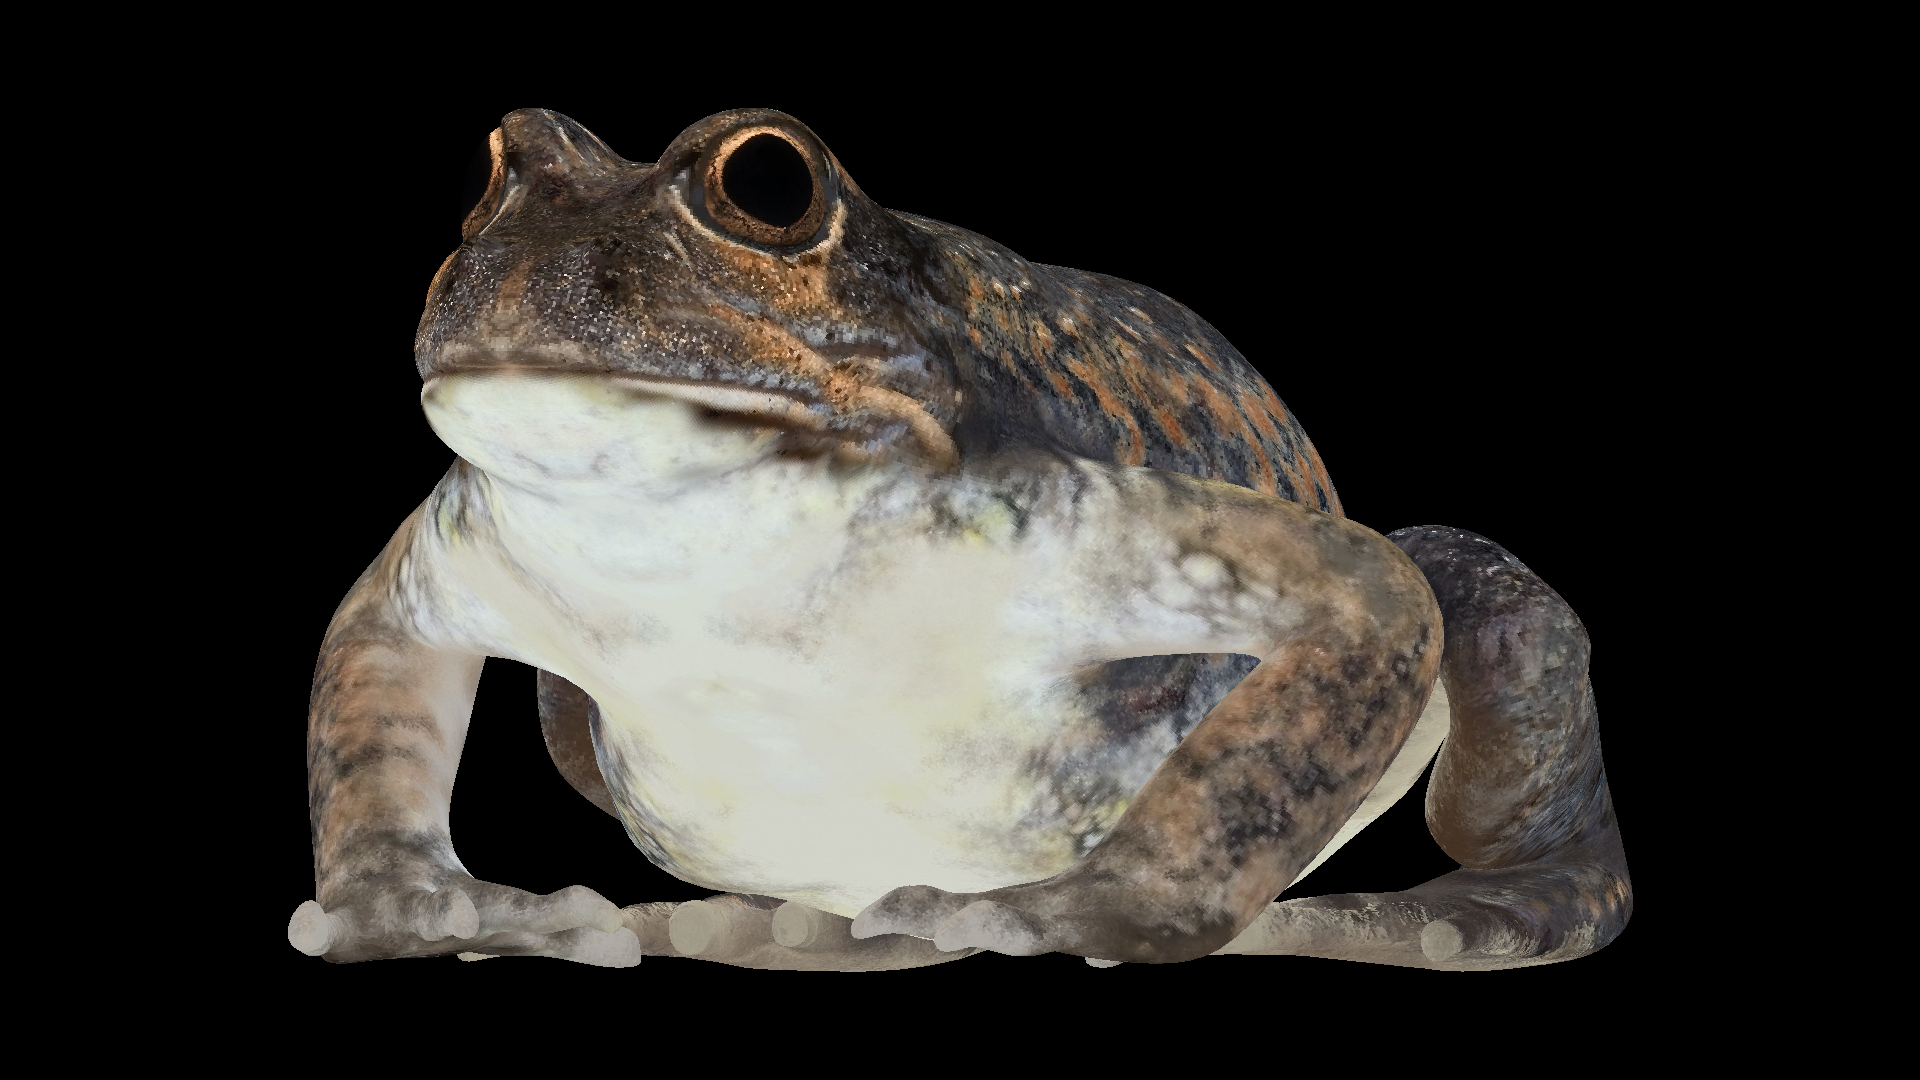

In [2]:
obj = ObjModel()
obj.readModel('model/model_3.obj')
obj.rotateObj(90, 0, 150)
texture_array = np.array(ImageOps.flip(Image.open('model/frog_texture.jpg')))

scale, move = obj.scaleObjToImgOld(WIDTH, HEIGHT, 0.8)


for frame in range(0, 1):
    ar = np.full((WIDTH, HEIGHT, 3), BACKROUND_COLOR, dtype=np.uint8)
    zBuffer = np.full((WIDTH, HEIGHT), fill_value=np.inf, dtype=float)

    for (pol, pol_texture) in zip(obj.polygons, obj.polygons_texture):
        vertexs = nf.movePol(obj.getVertexFromPolygon(pol), scale, move)
        n_old = gf.getNormal(vertexs)
        #I0 = np.dot(obj.normal[pol[0] - 1], l) / ((np.linalg.norm(obj.normal[pol[0] - 1]))*(np.linalg.norm(l)))
        #I1 = np.dot(obj.normal[pol[1] - 1], l) / ((np.linalg.norm(obj.normal[pol[1] - 1]))*(np.linalg.norm(l)))
        #I2 = np.dot(obj.normal[pol[2] - 1], l) / ((np.linalg.norm(obj.normal[pol[2] - 1]))*(np.linalg.norm(l)))
        #gf.drawTriangleShadow(ar, vertexs, 0, 0, DEFAULT_COLOR, I0, I1, I2, zBuffer)
        gf.drawTriangleTexture(ar, vertexs, 0, 0, texture_array, obj.texture, pol_texture, zBuffer)
    img = ImageOps.flip(Image.fromarray(np.transpose(ar, (1, 0, 2)), mode="RGB"))
    img.save(folder + f"a_{frame}.jpg")
img

In [3]:
print(len(obj.vertex))
print(len(obj.normal))

29010
29010
